In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

<h2>Import the data</h2>

In [5]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [6]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


<h2>Checking for missing values</h2>

In [7]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<h1>Data visualisation</h1>

Text(0.5, 1.0, 'smoking')

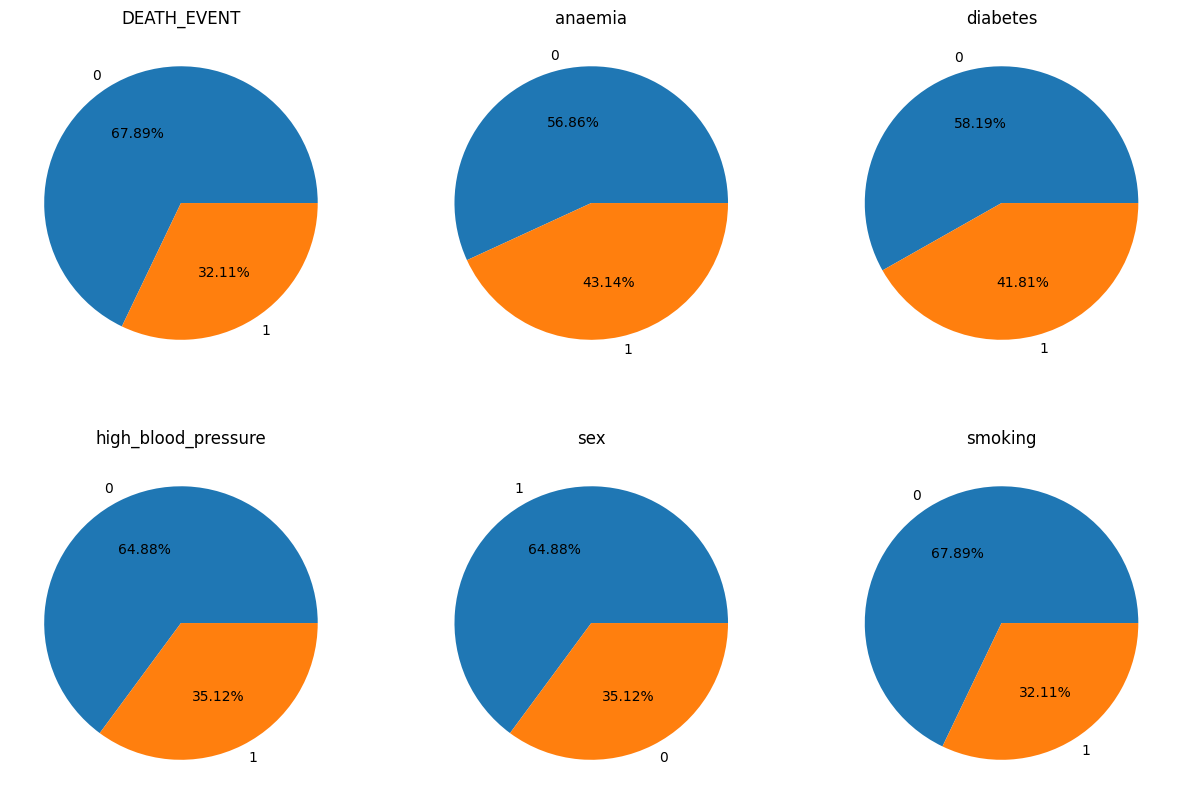

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.pie(data['DEATH_EVENT'].value_counts().values, labels=data['DEATH_EVENT'].value_counts().index,autopct="%1.2f%%")
plt.title('DEATH_EVENT')

plt.subplot(232)
plt.pie(data['anaemia'].value_counts().values, labels=data['anaemia'].value_counts().index,autopct="%1.2f%%")
plt.title('anaemia')

plt.subplot(233)
plt.pie(data['diabetes'].value_counts().values, labels=data['diabetes'].value_counts().index,autopct="%1.2f%%")
plt.title('diabetes')

plt.subplot(234)
plt.pie(data['high_blood_pressure'].value_counts().values, labels=data['high_blood_pressure'].value_counts().index,autopct="%1.2f%%")
plt.title('high_blood_pressure')

plt.subplot(235)
plt.pie(data['sex'].value_counts().values, labels=data['sex'].value_counts().index,autopct="%1.2f%%")
plt.title('sex')

plt.subplot(236)
plt.pie(data['smoking'].value_counts().values, labels=data['smoking'].value_counts().index,autopct="%1.2f%%")
plt.title('smoking')

<AxesSubplot: >

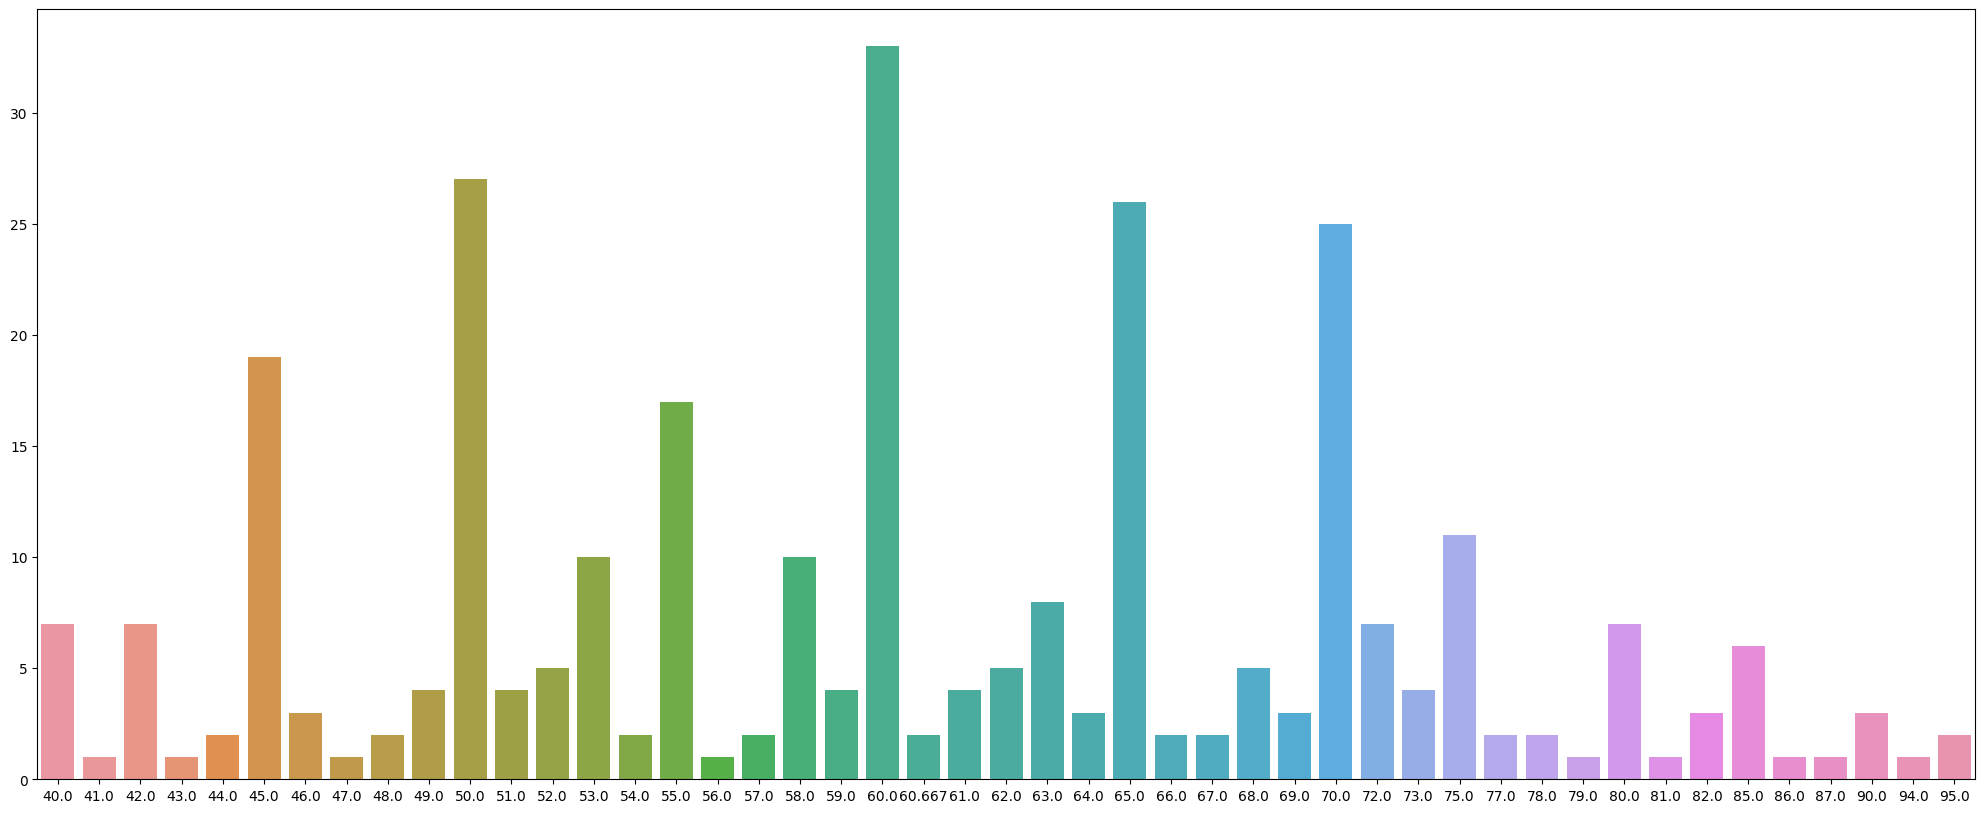

In [10]:
plt.figure(figsize=(25,10))
sns.barplot(y = data['age'].value_counts().values, x = data['age'].value_counts().index)

<AxesSubplot: >

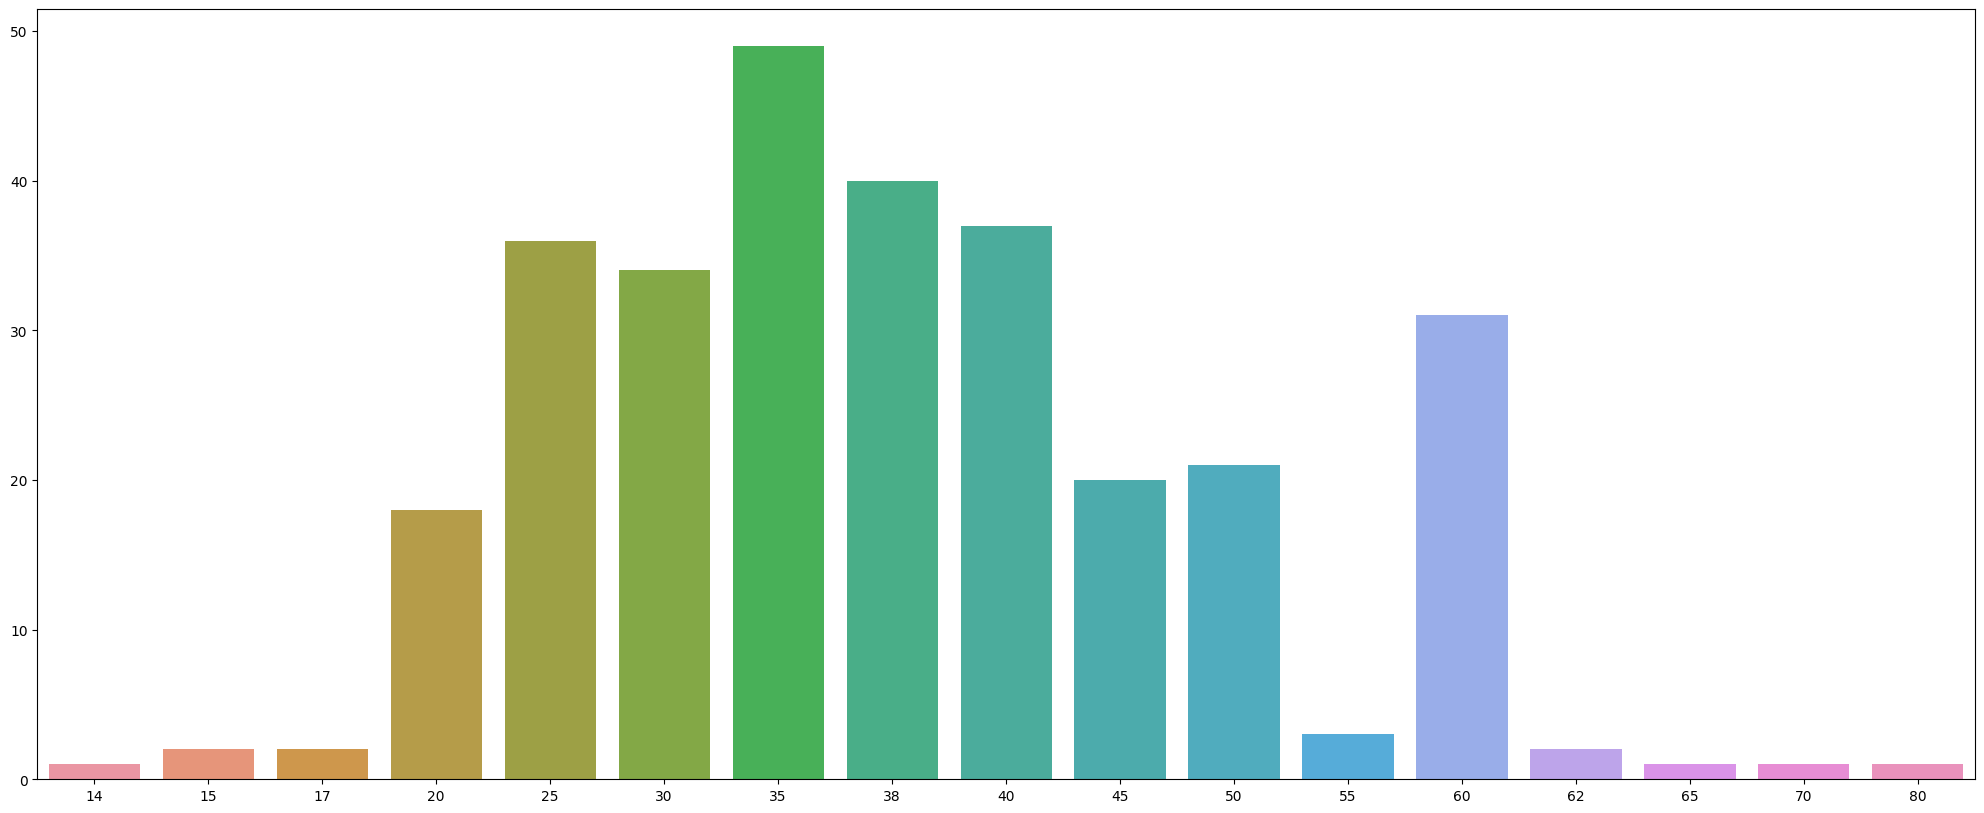

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(y = data['ejection_fraction'].value_counts().values, x = data['ejection_fraction'].value_counts().index)

<AxesSubplot: >

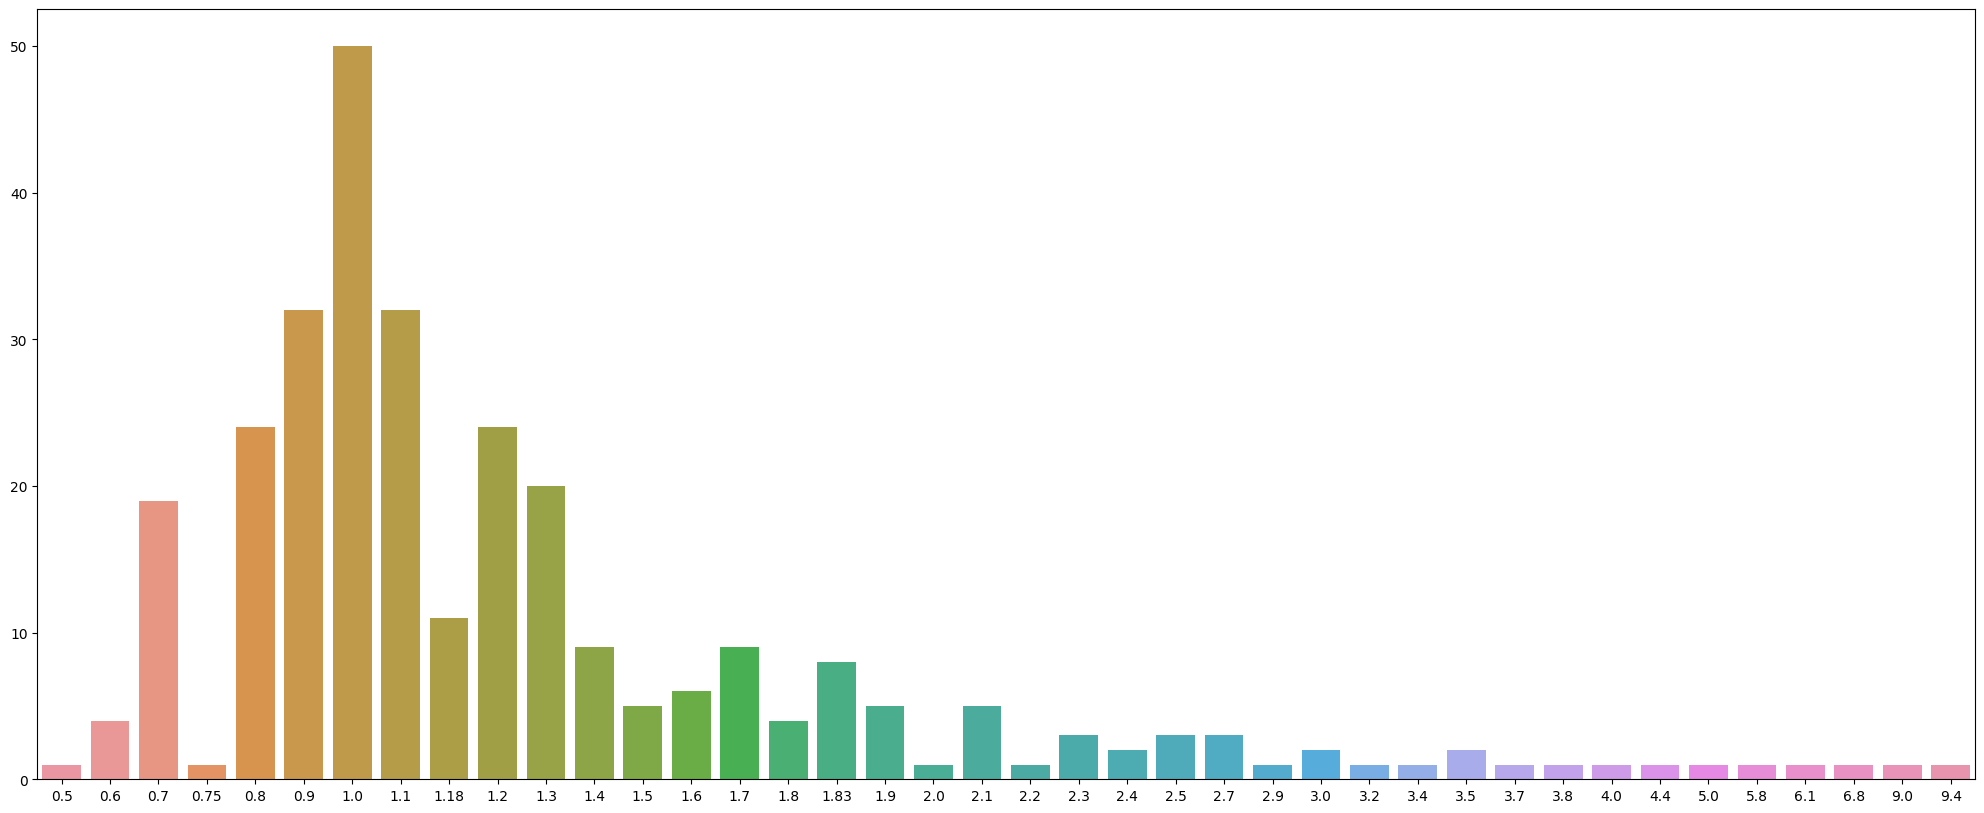

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(y = data['serum_creatinine'].value_counts().values, x = data['serum_creatinine'].value_counts().index)

<AxesSubplot: >

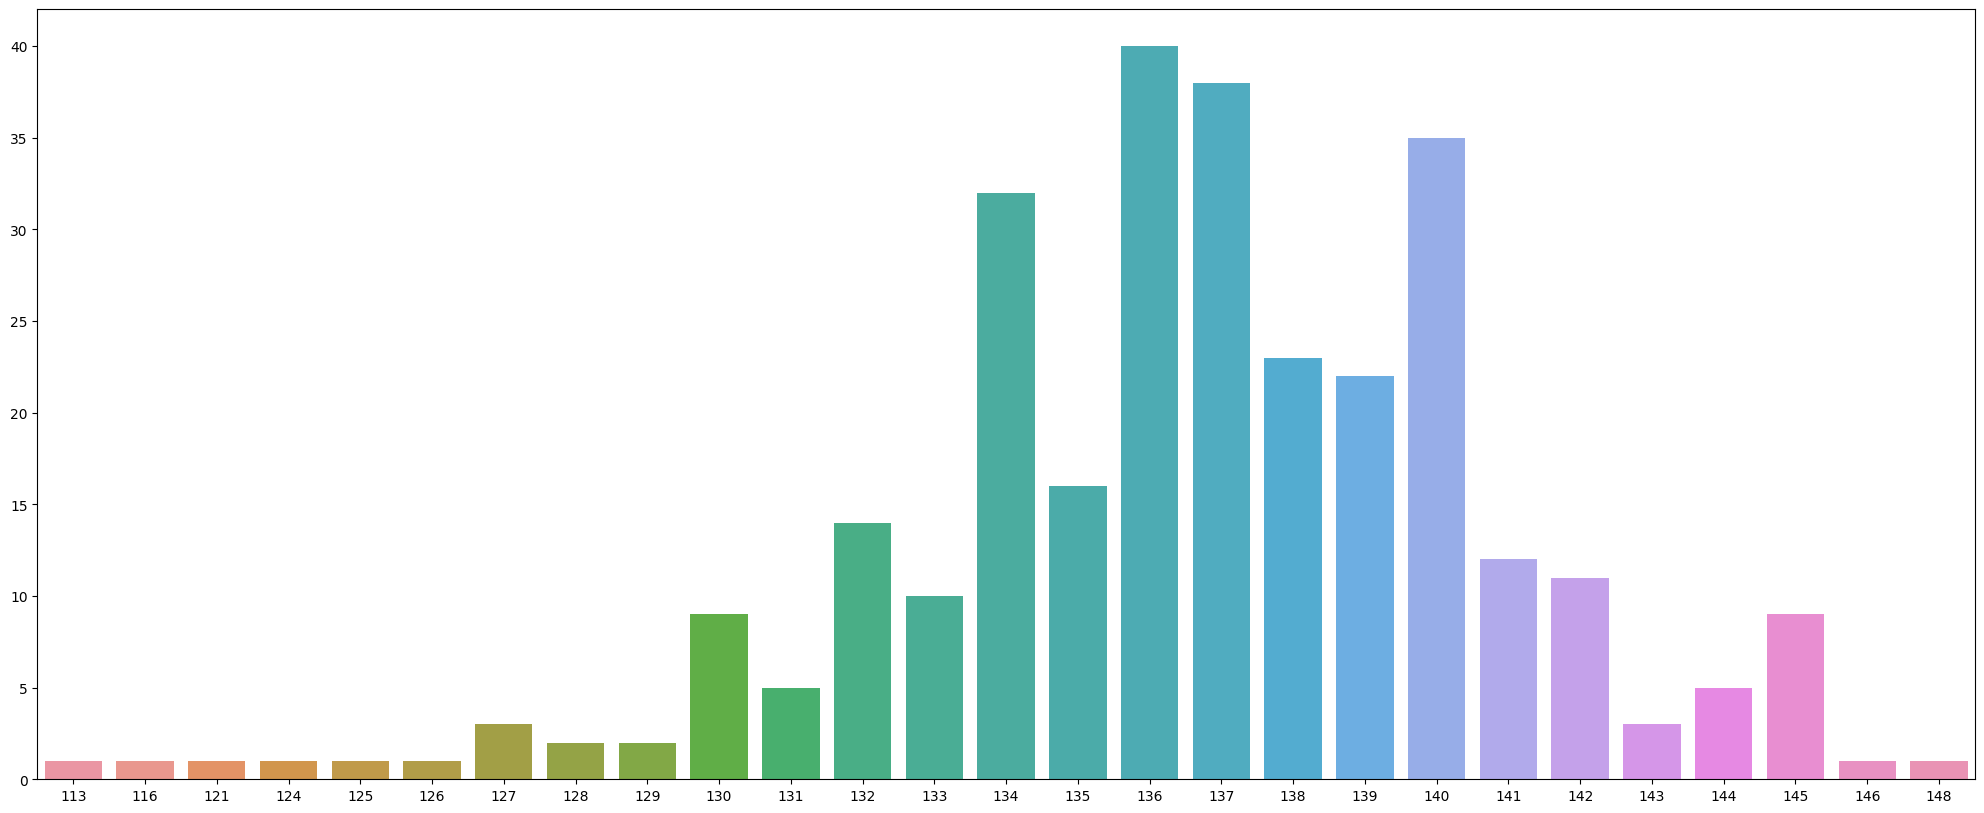

In [13]:
plt.figure(figsize=(25,10))
sns.barplot(y = data['serum_sodium'].value_counts().values, x = data['serum_sodium'].value_counts().index)

In [14]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

<h1>Normalize the data</h1>

In [15]:
X = normalize(X)

In [16]:
X = pd.DataFrame(X)

In [17]:
X.columns = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']

In [18]:
X.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.000283,0.000000,0.002196,0.000000,0.000075,0.000004,0.999997,0.000007,0.000491,0.000004,0.000000,0.000015
1,0.000209,0.000000,0.029836,0.000000,0.000144,0.000000,0.999555,0.000004,0.000516,0.000004,0.000000,0.000023
2,0.000401,0.000000,0.000901,0.000000,0.000123,0.000000,0.999999,0.000008,0.000796,0.000006,0.000006,0.000043
3,0.000238,0.000005,0.000529,0.000000,0.000095,0.000000,1.000000,0.000009,0.000652,0.000005,0.000000,0.000033
4,0.000199,0.000003,0.000489,0.000003,0.000061,0.000000,1.000000,0.000008,0.000355,0.000000,0.000000,0.000024
5,0.000441,0.000005,0.000230,0.000000,0.000196,0.000005,1.000000,0.000010,0.000647,0.000005,0.000005,0.000039
6,0.000591,0.000008,0.001937,0.000000,0.000118,0.000000,0.999997,0.000009,0.001079,0.000008,0.000000,0.000079
7,0.000132,0.000002,0.000694,0.000002,0.000132,0.000000,1.000000,0.000002,0.000289,0.000002,0.000002,0.000022
8,0.000247,0.000000,0.000596,0.000000,0.000247,0.000000,1.000000,0.000006,0.000524,0.000000,0.000000,0.000038
9,0.000206,0.000003,0.000317,0.000000,0.000090,0.000003,1.000000,0.000024,0.000343,0.000003,0.000003,0.000026


<h2>Evaluation using train test split</h2>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [20]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
predictions = model.predict(X_test)

In [22]:
accuracy_score(y_test,predictions)

0.8666666666666667

In [23]:
acc = {}
for i in range(50,1000,50):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc[i] = accuracy_score(y_test,predictions)

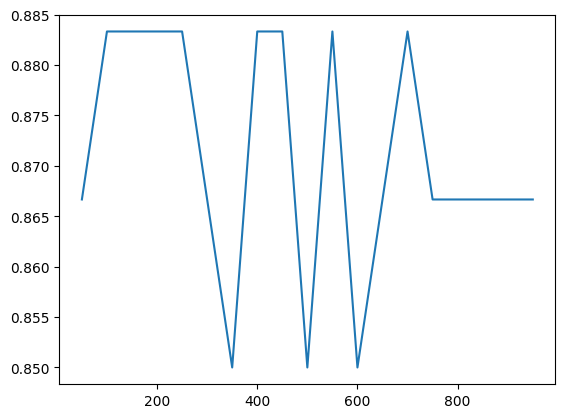

In [24]:
plt.plot(list(acc.keys()),list(acc.values()))

<h2>Evaluation using cross validation</h2>

In [25]:
def get_score(n_estimators):
    model = RandomForestClassifier(n_estimators, random_state=0)
    scores = cross_val_score(model, X, y,
                              cv=10,
                              scoring='accuracy')
    return scores.mean()

In [26]:
acc ={}
for i in range(50,1000,50):
    acc[i] = get_score(i)

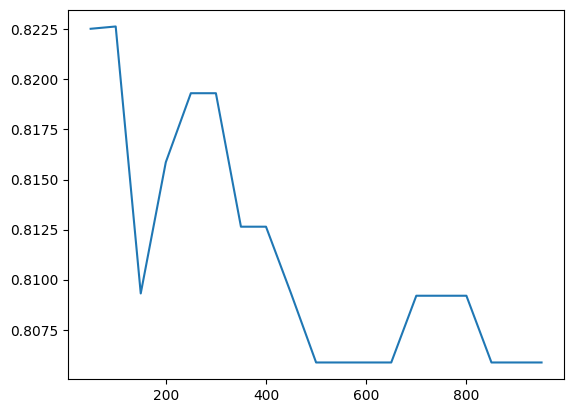

In [27]:
plt.plot(list(acc.keys()),list(acc.values()))